# Part I - ('Loan Data from Prosper' Data Exploration)
## by (Lizz Mwangi)

## Introduction
This document explores a data set containing 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.



## Preliminary Wrangling


In [1]:
#import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#set plots to be embedded inline
%matplotlib inline

In [2]:
#load the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
#set the max columns and rows to none
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
#display a few rows
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [3]:
#overview of data shape and composition
print(df.shape)
print(df.info())

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRa

In [4]:
#subset the dataframe by selecting features of interest
cols = ['CreditGrade', 'BorrowerAPR', 'StatedMonthlyIncome','IsBorrowerHomeowner', 'IncomeRange', 'ProsperRating (Alpha)', 
        'EmploymentStatus', 'LP_NetPrincipalLoss', 'Term', 'EstimatedReturn', 'LoanStatus', 'LoanOriginalAmount']
df_sub = df[cols]
df_sub.head()

,CreditGrade,BorrowerAPR,StatedMonthlyIncome,IsBorrowerHomeowner,IncomeRange,ProsperRating (Alpha),EmploymentStatus,LP_NetPrincipalLoss,Term,EstimatedReturn,LoanStatus,LoanOriginalAmount
0,C,0.16516,3083.333333,True,"$25,000-49,999",NaN,Self-employed,0.0,36,NaN,Completed,9425
1,NaN,0.12016,6125.000000,False,"$50,000-74,999",A,Employed,0.0,36,0.05470,Current,10000
2,HR,0.28269,2083.333333,False,Not displayed,NaN,Not available,0.0,36,NaN,Completed,3001
3,NaN,0.12528,2875.000000,True,"$25,000-49,999",A,Employed,0.0,36,0.06000,Current,10000
4,NaN,0.24614,9583.333333,True,"$100,000+",D,Employed,0.0,36,0.09066,Current,15000


In [5]:
#info on our data sub set
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
CreditGrade              28953 non-null object
BorrowerAPR              113912 non-null float64
StatedMonthlyIncome      113937 non-null float64
IsBorrowerHomeowner      113937 non-null bool
IncomeRange              113937 non-null object
ProsperRating (Alpha)    84853 non-null object
EmploymentStatus         111682 non-null object
LP_NetPrincipalLoss      113937 non-null float64
Term                     113937 non-null int64
EstimatedReturn          84853 non-null float64
LoanStatus               113937 non-null object
LoanOriginalAmount       113937 non-null int64
dtypes: bool(1), float64(4), int64(2), object(5)
memory usage: 9.7+ MB


### Cleaning the data
- Remove the rows with missing BorrowerAPR values
- Merge CreditGrade and ProsperRating (Alpha) columns into one since they have have similar values then drop them.
- Convert the new column into ordered categorical type

In [6]:
#remove the rows with missing BorrowerAPR values
df_sub.dropna(subset = ['BorrowerAPR'], inplace=True)
#test
df_sub['BorrowerAPR'].isna().sum()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0

In [7]:
#check the unique values in these columns
print(df_sub['ProsperRating (Alpha)'].value_counts())
print(df_sub['CreditGrade'].value_counts())
print(df_sub['EmploymentStatus'].value_counts())

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64
C     5646
D     5152
B     4387
HR    3506
AA    3495
A     3314
E     3288
NC     140
Name: CreditGrade, dtype: int64
Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64


In [8]:
#Merge CreditGrade and ProsperRating (Alpha) columns into one since they have have similar values then drop them

#replace NaNs in the two columns with spaces
df_sub['CreditGrade'] = df_sub['CreditGrade'].fillna(' ')
df_sub['ProsperRating (Alpha)'] = df_sub['ProsperRating (Alpha)'].fillna(' ')

#concatenate the two columns
df_sub['ProsperRating'] = (df_sub['CreditGrade'] + df_sub['ProsperRating (Alpha)']).str.strip()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

In [9]:
#drop CreditGrade and ProsperRating (Alpha) columns using drop method
df_sub.drop(columns=['CreditGrade', 'ProsperRating (Alpha)'], inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [10]:
#checking unique values in the new ProsperRating column
df_sub['ProsperRating'].value_counts()

C     23991
B     19968
D     19426
A     17865
E     13083
HR    10441
AA     8867
NC      140
        131
Name: ProsperRating, dtype: int64

In [11]:
#replace empty strings with np.nan objects
df_sub['ProsperRating'].replace('', np.nan, inplace=True)
#drop the rows with nan values
df_sub.dropna(subset=['ProsperRating'], inplace=True)


#drop rows with NC in the ProsperRating column
df_sub.drop(index=df_sub[df_sub['ProsperRating'] == 'NC'].index, inplace=True)
df_sub['ProsperRating'].value_counts()


/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


C     23991
B     19968
D     19426
A     17865
E     13083
HR    10441
AA     8867
Name: ProsperRating, dtype: int64

In [12]:
# convert ProsperRating and EmploymenStatus into ordered categorical types
cat_var_dict = {'ProsperRating': ['AA','A','B','C','D','E', 'HR'],
                'EmploymentStatus': ['Employed','Full-time', 'Self-employed', 'Part-time', 'Retired ', 'Not employed', 'Not available', 'Other' ]}

for var in cat_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = cat_var_dict[var])
    df_sub[var] = df_sub[var].astype(ordered_var)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113641 entries, 0 to 113936
Data columns (total 11 columns):
BorrowerAPR            113641 non-null float64
StatedMonthlyIncome    113641 non-null float64
IsBorrowerHomeowner    113641 non-null bool
IncomeRange            113641 non-null object
EmploymentStatus       110661 non-null category
LP_NetPrincipalLoss    113641 non-null float64
Term                   113641 non-null int64
EstimatedReturn        84853 non-null float64
LoanStatus             113641 non-null object
LoanOriginalAmount     113641 non-null int64
ProsperRating          113641 non-null category
dtypes: bool(1), category(2), float64(4), int64(2), object(2)
memory usage: 8.1+ MB


In [14]:
df_sub.describe()

,BorrowerAPR,StatedMonthlyIncome,LP_NetPrincipalLoss,Term,EstimatedReturn,LoanOriginalAmount
count,113641.000000,1.136410e+05,113641.000000,113641.000000,84853.000000,113641.000000
mean,0.218845,5.611465e+03,681.408389,40.843041,0.096068,8350.240450
std,0.080369,7.484921e+03,2359.282175,10.446539,0.030403,6247.060602
min,0.006530,0.000000e+00,-954.550000,12.000000,-0.182700,1000.000000
25%,0.156290,3.208333e+03,0.000000,36.000000,0.074080,4000.000000
50%,0.209760,4.666667e+03,0.000000,36.000000,0.091700,6500.000000
75%,0.283860,6.833333e+03,0.000000,36.000000,0.116600,12000.000000
max,0.512290,1.750003e+06,25000.000000,60.000000,0.283700,35000.000000


### What is the structure of your dataset?

This data set contains 113,937 loans (rows) with 81 variables (columns) on each loan, including (loan amount, borrower APR, employment status, borrower rate (or interest rate), current loan status, borrower income) and many others.

### What is/are the main feature(s) of interest in your dataset?
In the interest of the investor, I am interested in evaluating the lender's credit risk. I will investigate the data set to tell the borrower features that best predict the rate of return.
My main features of interest will be: Borrower APR, Employment Status, Loan Original Amounts and Prosper Ratings.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that: 

1. **CreditGrade** (for loans prior to 2008) and **ProsperRating (Alpha)** (for loans after 2009) are associated with **BorrowerAPR**. In the clean dataset, these columns are merged into one column,**ProsperRating**.
2. Borrower's **StatedMonthlyIncome**, **IsBorrowerHomeowner**, **Loan Original Amount**, **EmploymentStatus**, **IncomeRange** will have effects on the **LoanStatus** and also on the **BorrowerAPR**.

## Univariate Exploration

I'll begin by looking at the distribution of the main variable of interest: BorrowerAPR
##### What is the distribution of Borrower APRs like?


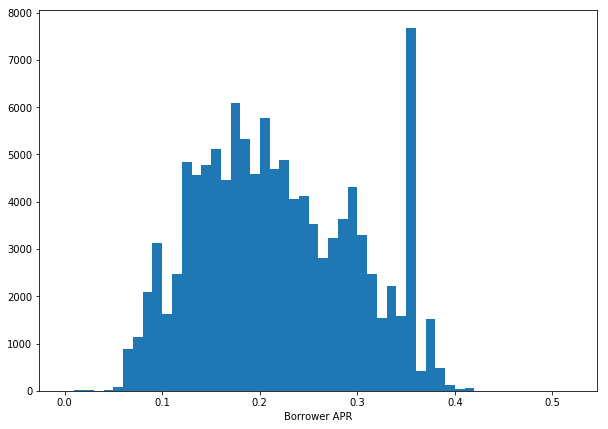

In [15]:
#plot BorrowerAPR on a standard scale
binsize = 0.01
bins = np.arange(0, df_sub['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[10, 7])
plt.hist(data = df_sub, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')
plt.show()

The distribution of the borrower APR's looks multimodal with several peaks. There is also a peculiar peak between 0.3 and 0.4

I'll then look at Borrower's Stated Monthly Income which is another feature of interest
##### What is the distribution of the Borrowers' Stated Monthly Income?

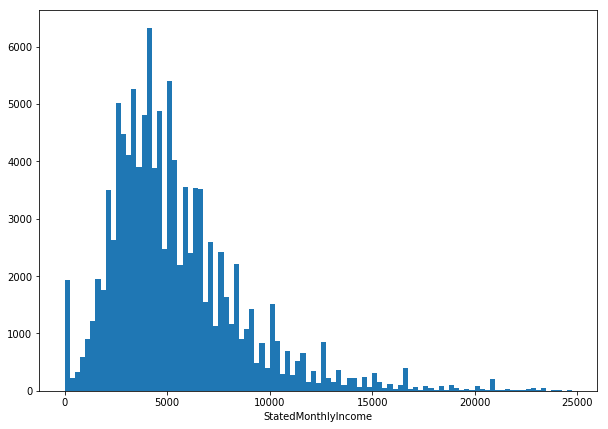

In [16]:
#plot stated monthly income on a standard scale
plt.figure(figsize=[10, 7])

bins = np.arange(0, 25000, 250)
plt.hist(data = df_sub, x = 'StatedMonthlyIncome', bins = bins)

plt.xlabel('StatedMonthlyIncome')
plt.show()

Looking at the descriptive statics, 75% of the Stated Monthly Incomes are below 6,817. Having the maximum values as 1,750,003 shows that there quite a wide range of values to plot.

Using standard scale, we will make a bad visual trying to represent all the values. Above, I plotted values upto 25000 which is above the upper quartile. Values beyond that upto the maximum value are not plotted. With this, we can miss some outliers.

It gives us an idea that the data is skewed to the right. There are a few borrowers with relatively high monthly incomes as compared to the biggest percentage of the borrowers.


To sort this, let's use a log scale and see how that goes.

In [17]:
#transform the describe() of this column to a scale of log10
np.log10(df_sub['StatedMonthlyIncome'].describe())

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


count    5.055535
mean     3.749076
std      3.874187
min          -inf
25%      3.506279
50%      3.669007
75%      3.834633
max      6.243039
Name: StatedMonthlyIncome, dtype: float64

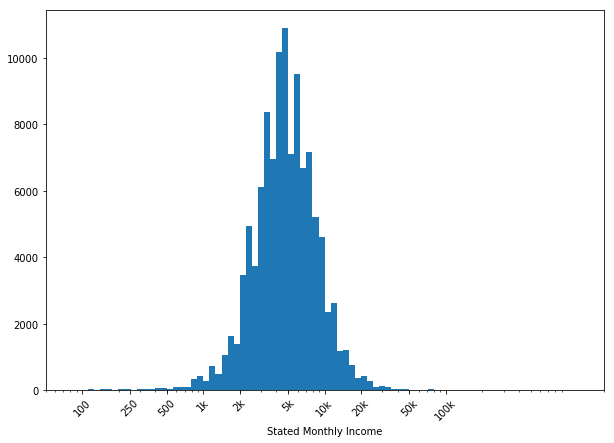

In [18]:
#plot StatedMonthlyIncome on a log scale
bins = 10 ** np.arange(-1, 7+0.05, 0.05)

#generate the x-ticks you want to apply
ticks = [100, 250, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5]
#add labels as string values, to be displayed along the x-axis
labels = [100, 250, 500, '1k', '2k', '5k', '10k', '20k', '50k', '100k']

plt.figure(figsize=[10, 7])
#plot the histogram
plt.hist(data = df_sub, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xlim((50,2e6));
#apply x-ticks
plt.xticks(ticks, labels, rotation=45);
plt.xlabel('Stated Monthly Income')
plt.show()

With the log transformation, the stated monthly income looks fairly normally distributed. Most borrowers earn approximately 5000.

Another area of interest is the Loan Original Amounts that borrowers get.
##### What is the distribution of Loan Original Amounts?

In [19]:
#transform the describe() of this column to a scale of log10
np.log10(df_sub['LoanOriginalAmount'].describe())

count    5.055535
mean     3.921699
std      3.795676
min      3.000000
25%      3.602060
50%      3.812913
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

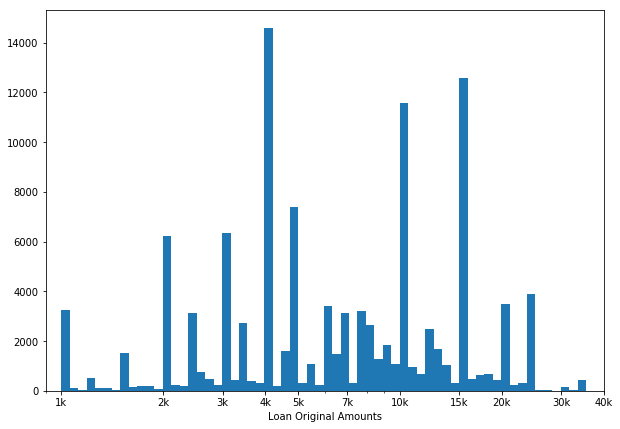

In [20]:
#plot the loan original amount on a log scale
bins = 10 ** np.arange(3, 5+0.025, 0.025)

#generate the x-ticks you want to apply
ticks = [1000, 2000, 3000, 4000, 5000, 7000, 10000, 15000,20000, 30000, 40000]
#add labels as string values, to be displayed along the x-axis
labels = ['1k','2k', '3k', '4k', '5k', '7k', '10k','15k', '20k','30k', '40k']

plt.figure(figsize=[10, 7])
plt.hist(data = df_sub, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlim((900,40000))
plt.xlabel('Loan Original Amounts')
plt.show()

This distribution appears to be multimodal. There are several peaks but the most significant onces are 4000, 10000 and 15000 worth loans.

Now, let's look at the categorical variables. The Prosper Ratings and Employment Status. We would also like to see how many borrowers are home owners and the length of the loan terms.

The aim is to observe how their value counts look like.

##### How does the distribution of the ordinal variables look like?

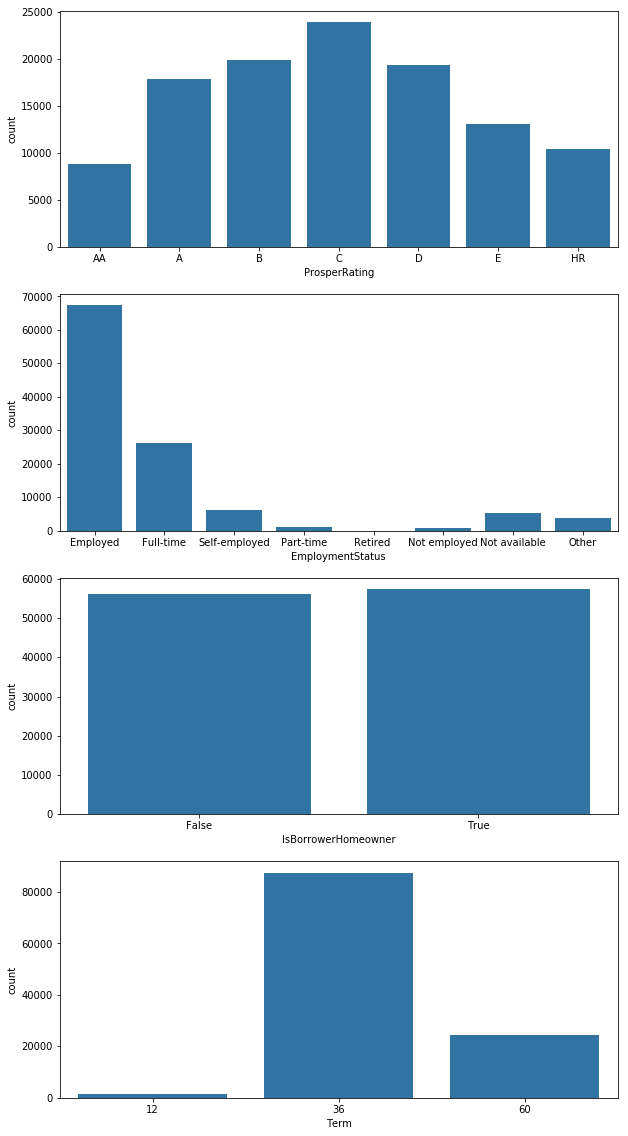

In [21]:
#plot the two together to observe the distribution of each ordinal variable.
#plot the IsBorrowerHomeOwner and Term columns too
fig, ax = plt.subplots(nrows=4, figsize = [10,20])

base_color = sb.color_palette()[0]
sb.countplot(data = df_sub, x = 'ProsperRating', color = base_color, ax = ax[0])
sb.countplot(data = df_sub, x = 'EmploymentStatus', color = base_color, ax = ax[1])
sb.countplot(data = df_sub, x = 'IsBorrowerHomeowner', color = base_color, ax = ax[2])
sb.countplot(data = df_sub, x = 'Term', color = base_color, ax = ax[3])
plt.show()

Most borrowers seem to have Posper Rating 'C'.There is also a fairly good number in the High Risk region.Overall, the distribution amongst the prosper ratings is normal.

Most borrowers are employed and full time. Retired borrowers are very few. We also have a very small number of them that are part time and not employed.

The term of most loans is 36 months and the shortest term is 12 months.

Home owners and non home owners seem to be in equal numbers. I'll represent this same data on a pie chart to further investigate if this is the case.

In [22]:
#displaying the value counts of the homeowners and they that don't
counts = df_sub['IsBorrowerHomeowner'].value_counts()
counts

True     57412
False    56229
Name: IsBorrowerHomeowner, dtype: int64

From the value counts, the homeowners are just slightly more than the non homeowners. That is why the bars in the graph above didn't show much difference.

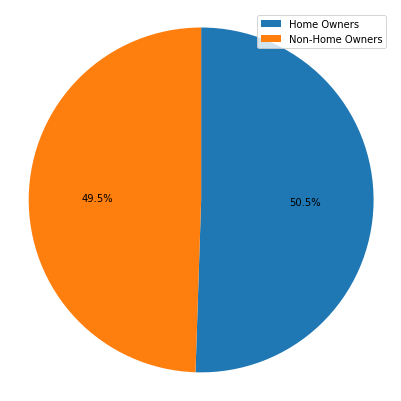

In [23]:
#plotting a piechart to represent the data 
plt.figure(figsize=[10, 7])
plt.pie(counts, startangle = 90, autopct='%1.1f%%', counterclock = False);
labels=['Home Owners', 'Non-Home Owners']
plt.legend(labels, loc='best')
plt.axis('square');
plt.show()

We can now clearly see the difference, however small, there is between the value counts of the borrowers that own homes and those that don't.

One more thing to look at is the distribution of the Loan Status.

##### How does the distribution of the Loan Status look like?

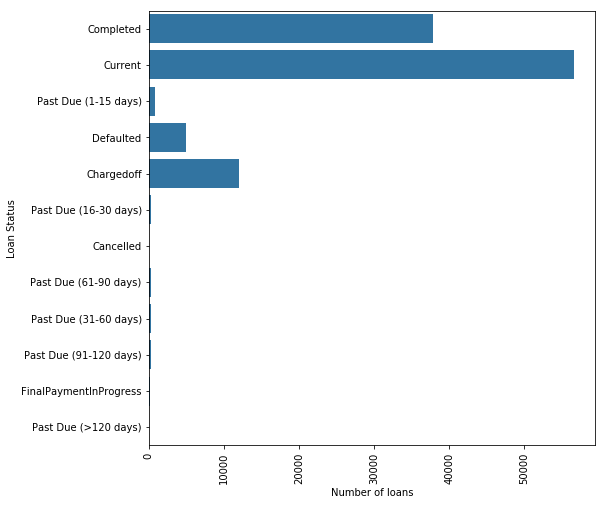

In [24]:
#plot bar graph to show 
plt.figure(figsize=[8, 8])
sb.countplot(data = df_sub, y = 'LoanStatus', color = base_color);
plt.xticks(rotation=90);
plt.ylabel('Loan Status');
plt.xlabel('Number of loans');

Most loans are current. We have over 30000 loans that have already been completed. Defaulted loans are less than 10000. Loans that are past the due date are just a few. Most borrowers seem to clear before their due dates.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of the borrower APR's looked multimodal with several peaks.

The stated monthly income had quite a number of large values, so I used a log transform to look at the data. Under the transformation, the data looked normally distributed (Unimodal). Most borrowers earn approximately 5000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

For loans prior to 2008, Credit Grades were used but this changed to ProsperRating (Alpha) for loans after 2009. For this reason, I merged these two columns into one column,'ProsperRating' since they contained the same values. I then dropped null values and the rating 'NC' that was not common to all the loans.

I also found it quite unusual that the number of borrowers that own homes and those that don't was almost the same. I, however, did not investigate further on this.

Another interesting observation was that most loans are current. Most borrowers seem to clear making payments before their due dates and only a few defaulted.

## Bivariate Exploration

In this section, I will investigate relationships between pairs of variables in the
data.

Let's begin with showing correlation between the quantitative variables.
##### Quantitative vs Quantitative variables

In [25]:
#declaring the numerical and categorical variables
numeric_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LP_NetPrincipalLoss', 'Term', 'LoanOriginalAmount']
categoric_vars = ['ProsperRating', 'EmploymentStatus']

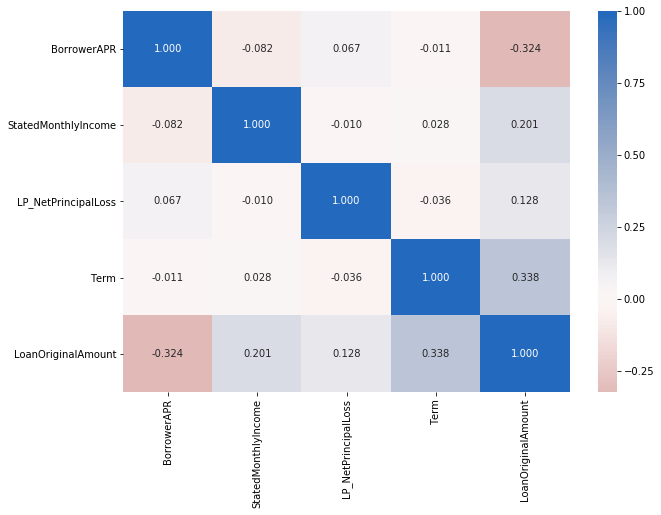

In [26]:
# correlation plot
plt.figure(figsize = [10, 7])
sb.heatmap(df_sub[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()


From the correlation plot, the correlation between the pairs is weak. For example, you wouldn't say that the more the stated monthly income, the longer the term of a borrower's loan and viceversa.
However, the Loan Original Amount and the term have a slightly strong positive correlation. Most big loan amounts are borrowed over a longer period of time.
The borrower APR and Loan Original Amount also have a slighly strong correlation but a negative one. The Borrower APR seems to mostly be lower for large loan amounts borrowed.

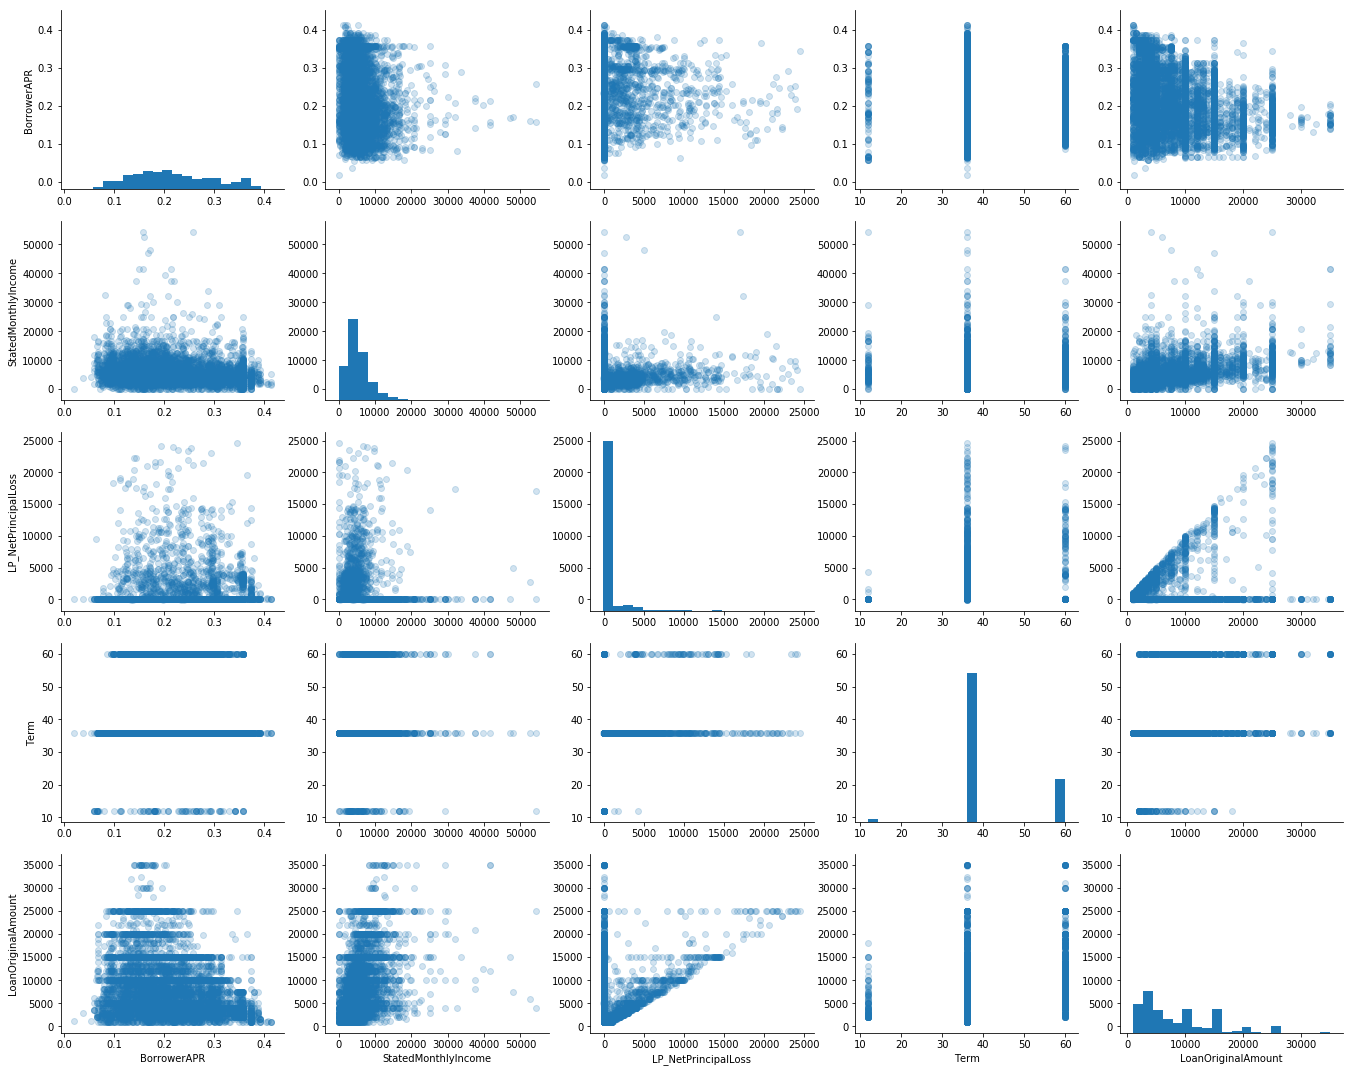

In [27]:
# plot matrix using 7000 sample loans so that plots are clearer and they render faster
sample_loans = df_sub.sample(n=7000, replace = False)

g = sb.PairGrid(data = sample_loans, vars = numeric_vars, size = 3, aspect = 1.25)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter, alpha = 0.2);


Here, we make similar observations as we had made using the heatmap. We can also clearly see that the Loan Orginal Amount have a correlation, though weak, with the LP Net Principal Loss. The bigger the loan amount lent out, the more likely the business is to make a loss. This would be expected.

##### Categorical vs Numerical Variables

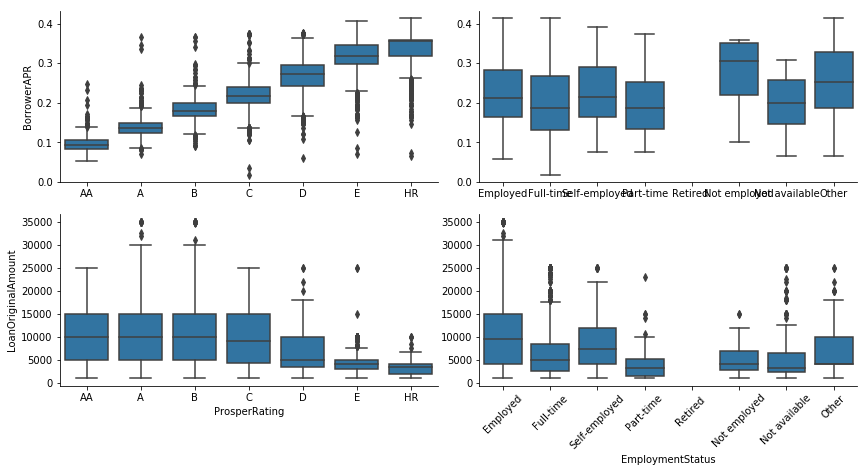

In [28]:
#plot matrix of numerical against categorical variables.

#we'll use the sample 7000 loans as before
#sample_loans = df_sub.sample(n=7000, replace = False)
def boxplots(x, y, **kwargs):
    '''A function to create box plots with seaborn's PairGrid. '''
    base_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=base_color)

plt.figure(figsize = [20, 15])
g = sb.PairGrid(data = sample_loans, y_vars = ['BorrowerAPR', 'LoanOriginalAmount'], x_vars = categoric_vars, size = 3, aspect = 2)
plt.xticks(rotation=45)
g.map(boxplots);
plt.show();

From the boxplots, Employed borrowers get larger amounts of loans as compared to any other group. Self employed get larger loans compared to borrowers that are employed full time. 

When the borrower's prosper rating in the High Risk Category, the borrower gets very small amounts of loans lended. The better the prosper rating a borrower has, the more likely they are to get a large amount of loan given to them.

On the other hand, the borrower APR is very high for High Risk Borrowers. Investors seem to earn more from such borrower's since their APR is high.

The Borrower APR doesn't seem to related on the employment status of the borrower.

Let's now see the relationship between the Categorical Variables.

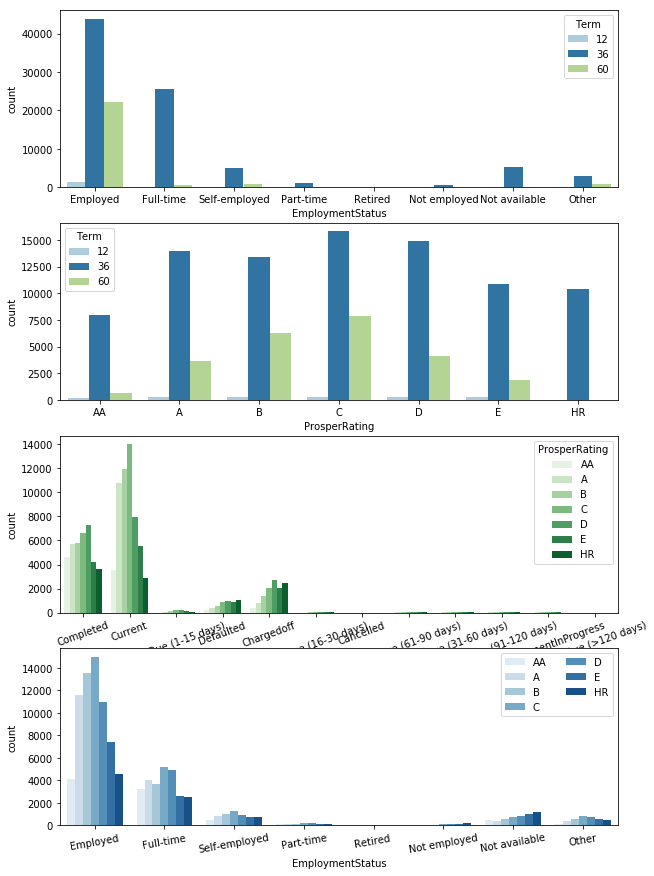

In [29]:
#relationship between categorical variables
plt.figure(figsize = [10, 15])

#subplot 1: Employment Status vs term
plt.subplot(4, 1, 1)
sb.countplot(data = df_sub, x = 'EmploymentStatus', hue = 'Term', palette = 'Paired')

#subplot 2: Prosper Rating vs. term
ax = plt.subplot(4, 1, 2)
sb.countplot(data = df_sub, x = 'ProsperRating', hue = 'Term', palette = 'Paired')

#subplot 3: Loan Status vs. Prosper Rating
ax = plt.subplot(4, 1, 3)
sb.countplot(data = df_sub, x = 'LoanStatus', hue = 'ProsperRating', palette = 'Greens')
plt.xticks(rotation=20)

#subplot 4: Prosper rating vs. employment status
#using a different color palette
ax = plt.subplot(4, 1, 4)
sb.countplot(data = df_sub, x = 'EmploymentStatus', hue = 'ProsperRating', palette = 'Blues')
ax.legend(loc = 1, ncol = 2); 
plt.xticks(rotation=10);



Most of the defaulted loans were from the borrowers with a High Risk Prosper Rating. We can also observe that the lowest number of borrowers that have completed making their payments have a High Risk Rating. We also have very few borrowers taking loans for a period of 12 0r 60 months. Those employed mostly take loans with a loan term of 36 months.

Let's now plot violin plots with the full data to see if there are more insights than what we observed with the boxplots.

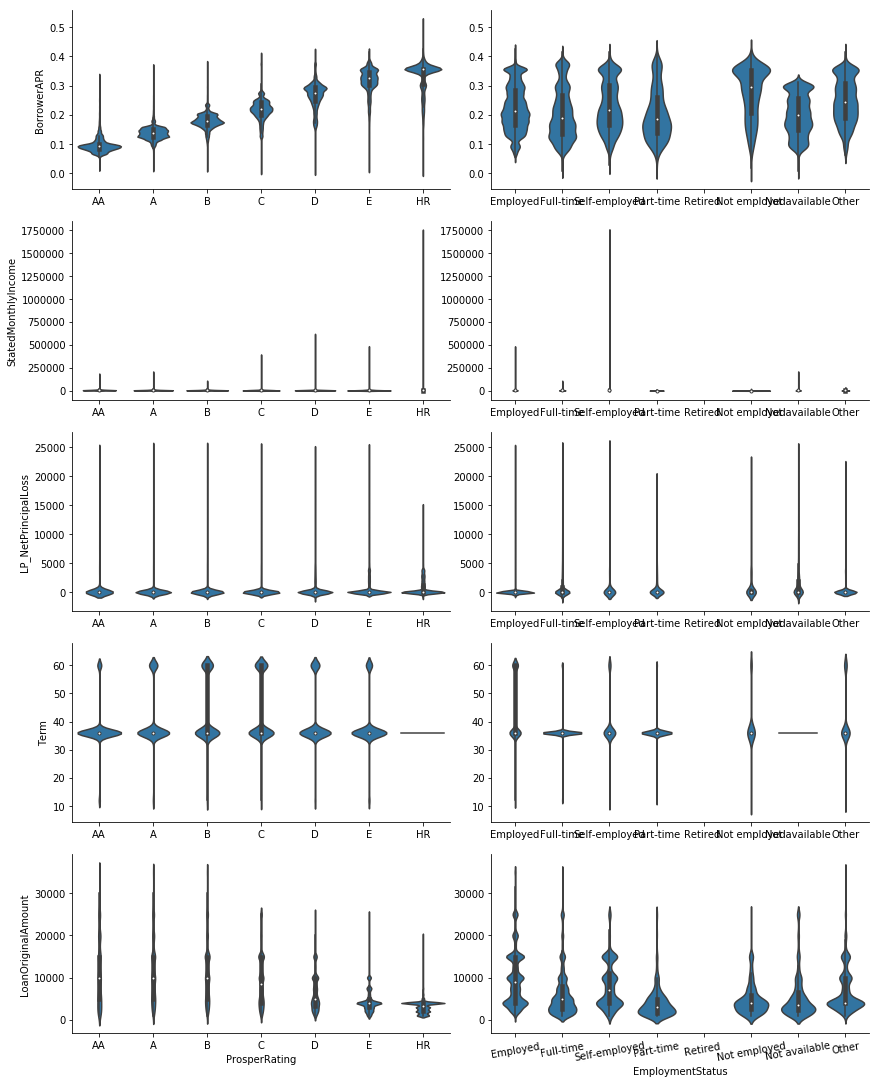

In [30]:
#Here we'll use the whole data
def violinplots(x, y, **kwargs):
    """ A function to create violin plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.violinplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_sub, y_vars = numeric_vars, x_vars = categoric_vars,
                size = 3, aspect = 2)
plt.xticks(rotation=10)
g.map(violinplots)
plt.show();

The observations here are not much different from the box plots. We can however see that if your employment status is 'Employed', the more likely you are to get a high loan amount The unemployed, part time employees and they that didn't give their employment status information got relatively smaller loans in amount. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Loan Status vs Prosper Rating: From the Prosper Rating that a borrower has, you can predict whether they will complete or default. I observed that most of the defaulted loans were from the borrowers with a High Risk Prosper Rating. Also, the lowest number of borrowers that have completed paying their loans have a High Risk Rating.

A borrower's employment status determine their original loan amounts given. Employed borrowers get larger amounts of loans as compared to any other group. 

Prosper Rating vs Loan Original Amounts: I observed that the better the prosper rating a borrower has, the more likely they are to get a large amount of loan given to them. When the borrower's prosper rating in the High Risk Category, the borrower gets very small amounts of loans.

Prosper Ratings vs Borrower APR: The borrower APR is very high for High Risk Borrowers. Investors seem to earn more from such borrower's since their APR is high.

The borrower APR vs Loan original amount: I observed that the Borrower APR is negatively associated with Loan amount given to a borrower. Bigger loan amounts have a lower APR.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
I observed that Prosper Ratings don't seem to have an effect on the LP Net Principal Loss. This was interesting because I expected that it would be significant that losses would be made mostly as a result of loans given to borrowers with a High Risk Rating.

## Multivariate Exploration

Following the work in the previous sections:

In this section, I will investigate how the categorical variables (Prosper rating and Employment Status) are associated with Borrower APR and Loan Original Amounts.
To begin with, let's see how the effect that Prosper Rating has on the relationship between Borrower APR and Loan Original Amounts.

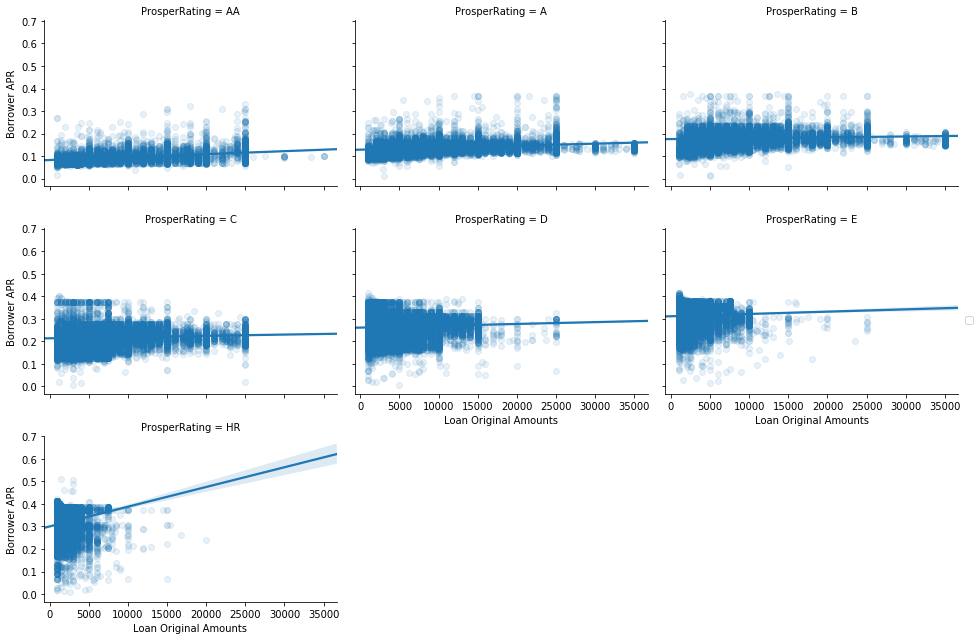

In [31]:
#effect of Prosper Rating on APR and Loan Original Amounts

g=sb.FacetGrid(data=df_sub, col = 'ProsperRating', col_wrap=3, size=3, aspect=1.5)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=1/25, scatter_kws={'alpha':0.1});
g.add_legend();
g.set_xlabels('Loan Original Amounts')
g.set_ylabels('Borrower APR')

plt.show()

Borrowers with High Risk Rating get low loan amounts but it's interesting how with this category, the Borrower APR increases with an increase in Loan Amounts.

We'll then proceed to observe the effect that Employment Status has on the relationship between Borrower APR and Loan Original Amounts.

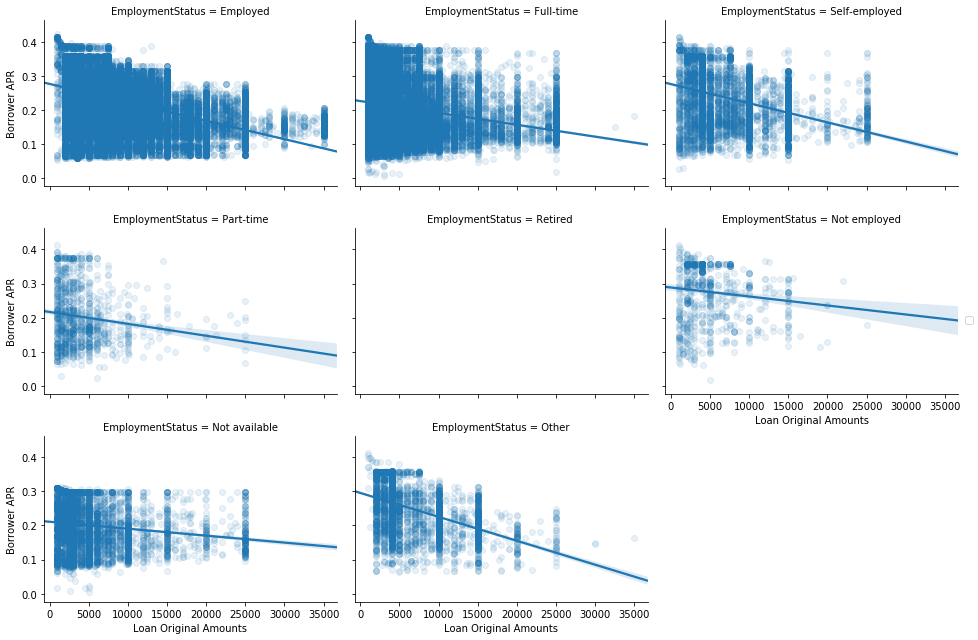

In [32]:
#effect of Employment Status on the relationship between Borrower APR and Loan Original Amounts.
g=sb.FacetGrid(data=df_sub, col = 'EmploymentStatus', col_wrap=3, size=3, aspect=1.5)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=1/25, scatter_kws={'alpha':0.1});
g.add_legend();
g.set_xlabels('Loan Original Amounts')
g.set_ylabels('Borrower APR')

plt.show()

Regardless of the Employment Status, the Borrower APR seems to decreasing with an increase in loan amounts. More significantly for the Employed, Full time  and Self employed Borrowers. 

I would also like to see the association between Prosper Rating, Loan Original Amount and Loan Status.

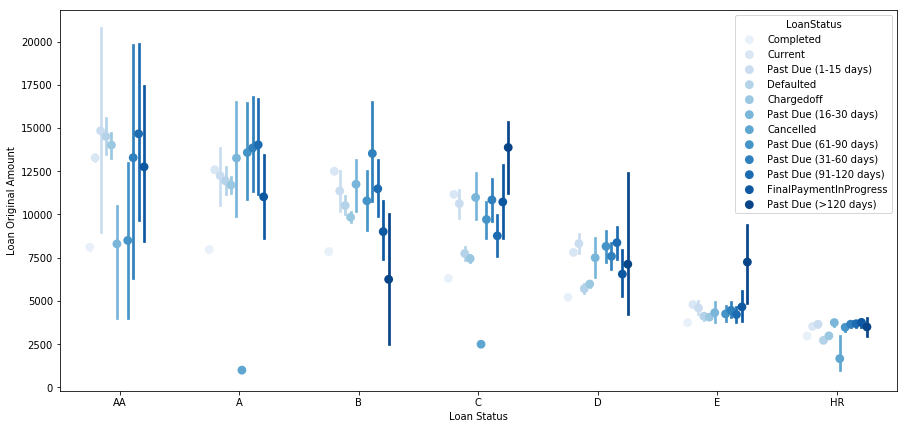

In [33]:
#to show the association between Prosper Rating, Loan Original Amount and Loan Status
plt.figure(figsize=[15,7])
sb.pointplot(data = df_sub, x = 'ProsperRating', y = 'LoanOriginalAmount', hue = 'LoanStatus',
           palette = 'Blues', linestyles = '', dodge = 0.5);
plt.ylabel('Loan Original Amount')
plt.xlabel('Loan Status')
plt.show();

Loans given to borrowers with a good Prosper Rating are completed if when the loan amounts are bigger. I have also observed that some borrowers with A and C Prosper Ratings and very low loan amounts below 2500 have their loans overdue.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

An observation made earlier that borrowers with High Risk Rating get low loan amounts was strengthened by the fact that with this category, the Borrower APR increases with an increase in Loan Amounts. This was however not the case with other Prosper Ratings.


### Were there any interesting or surprising interactions between features?

I noticed that there are borrowers with good prosper ratings, A and C to be specific whose loans are past their due date. Surprisingly, their loan amounts are very low, 2500 and below. I would expect these borrowers to clear their loans in time, especially because they are small amounts. 

## Conclusions
In conclusion: 
- Large Loan amounts have a low Borrower APR. The lender are more likely to earn more from borrowers that borrow small amounts.
- Borrower's prosper rating determines the loan amount they are likely to get. The better the prosper rating a borrower has, the more likely they are to get a large amount of loan given to them.
- From a Borrower's Prosper Rating, you can predict whether they will complete or default. I observed that most of the defaulted loans were from the borrowers with a High Risk Prosper Rating. Also, the lowest number of borrowers that have completed paying their loans have a High Risk Rating.
- A borrower's employment status determine their original loan amounts given. Employed borrowers get larger amounts of loans as compared to any other group.
- Stating your employment status as 'Other' reduces your chances of getting a large loan amount.
